In [1]:
import pandas as pd
import numpy as np

dfSchool = pd.read_csv("C:/Users/Amy Le - PC/Desktop/Analytics/Project_Education_Data/school_profile.csv", encoding="iso-8859-1", low_memory=False)
dfRace = pd.read_csv("C:/Users/Amy Le - PC/Desktop/Analytics/Project_Education_Data/School_Race.csv")
dfELA = pd.read_csv("C:/Users/Amy Le - PC/Desktop/Analytics/Project_Education_Data/ELA_performance.csv",encoding="iso-8859-1",low_memory=False)
dfMath = pd.read_csv("C:/Users/Amy Le - PC/Desktop/Analytics/Project_Education_Data/Math_performance.csv",encoding="iso-8859-1",low_memory=False)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dfSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 19 columns):
County Code                         2516 non-null int64
District Code                       2516 non-null int64
School Code                         2516 non-null int64
School_ID                           2516 non-null object
Geographic Region                   2516 non-null object
County Name                         2516 non-null object
District Name                       2516 non-null object
School Name                         2516 non-null object
Grade Type                          2516 non-null object
Total Enrollment                    2516 non-null int64
Dropout_Rate                        2516 non-null float64
Violence_rate                       2512 non-null float64
SuspensionRate                      2516 non-null float64
Internet_Met_requirement            2236 non-null object
Teacher_Count                       2488 non-null float64
Expenditure_perPupil                25

In [3]:
#Overall State Summary - Set up summary table

num_county = len(dfSchool['County Name'].unique())
num_district = len(dfSchool['District Name'].unique())
num_school = len(dfSchool['School Name'].unique())
num_student = dfSchool['Total Enrollment'].sum()

summary_table_data = {'Total Counties': [num_county],
                      'Total Districs': [num_district],
                      'Total Schools': [num_school], 
                      'Total Students': [num_student], 
                     }
dfSummary = pd.DataFrame(summary_table_data)
dfSummary = dfSummary[
                        ["Total Counties", "Total Districs", "Total Schools", "Total Students"]
                     ]
dfSummary



,Total Counties,Total Districs,Total Schools,Total Students
0,22,658,2392,1373521


Regions division:
Gateway Region, encompassing Middlesex County, Union County, Essex County, Hudson County, Bergen County, and Passaic County.
Skylands Region, encompassing Sussex County, Morris County, Warren County, Hunterdon County, and Somerset County.
Shore Region, encompassing Monmouth County and Ocean County.
Delaware River Region, encompassing Mercer County, Burlington County, Camden County, Gloucester County, and Salem County.
Greater Atlantic City Region, encompassing Atlantic County.
Southern Shore Region, encompassing Cumberland County and Cape May County.

# Data Import and Merging

In [4]:
# Calculate Student-Teacher Ratio
dfSchool['StudentTeacher_Ratio']=dfSchool['Total Enrollment']/dfSchool['Teacher_Count']

In [5]:
# Add Race data to the main data
### Pivot Race table to have School_ID as index
dfRace = pd.pivot_table(dfRace, values = 'Percent',index='School_ID',
                   columns='RacialAndEthnicGroup', aggfunc=np.sum)
dfRace.columns
#rename pivot table index
dfRace.index.name = 'School_ID'
#reset pivot table index, so School_ID becomes a column (for later merging)
dfRace_new = dfRace.reset_index()
#merge with main data set
dfSchool_new = dfSchool.merge(dfRace_new,how='left',on='School_ID')


In [6]:
#Add SchoolPerformance_ELA

dfELA = dfELA[['School_ID','SchoolPerformance_ELA']]
dfELA= dfELA.replace('N',np.NaN)
dfELA= dfELA.replace('*',np.NaN)
dfELA=dfELA.dropna(axis=0)
# Convert from object to numeric type
dfELA['SchoolPerformance_ELA'] = dfELA['SchoolPerformance_ELA'].apply(pd.to_numeric)  
dfELA = dfELA.groupby(['School_ID']).mean()
#dfELA.groupby(['School_ID']).sum().groupby(level=0).mean()
dfELA.head()

#merge with main data set
dfELA.index.name = 'School_ID'
#reset pivot table index, so School_ID becomes a column (for later merging)
dfELA = dfELA.reset_index()
dfSchool_new = dfSchool_new.merge(dfELA,how='left',on='School_ID')

In [7]:
#Add SchoolPerformance_Math

dfMath = dfMath[['School_ID','SchoolPerformance_Math']]
dfMath= dfMath.replace('N',np.NaN)
dfMath= dfMath.replace('*',np.NaN)
dfMath=dfMath.dropna(axis=0)

# Convert from object to numeric type
dfMath['SchoolPerformance_Math'] = dfMath['SchoolPerformance_Math'].apply(pd.to_numeric)  
dfMath = dfMath.groupby(['School_ID']).mean()

dfMath.head()

#rename pivot table index
dfMath.index.name = 'School_ID'
#reset pivot table index, so School_ID becomes a column (for later merging)
dfMath = dfMath.reset_index()
#merge with main data set
dfSchool_new = dfSchool_new.merge(dfMath,how='left',on='School_ID')

# Data Preprocessing

In [8]:
dfSchool_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2515
Data columns (total 29 columns):
County Code                            2516 non-null int64
District Code                          2516 non-null int64
School Code                            2516 non-null int64
School_ID                              2516 non-null object
Geographic Region                      2516 non-null object
County Name                            2516 non-null object
District Name                          2516 non-null object
School Name                            2516 non-null object
Grade Type                             2516 non-null object
Total Enrollment                       2516 non-null int64
Dropout_Rate                           2516 non-null float64
Violence_rate                          2512 non-null float64
SuspensionRate                         2516 non-null float64
Internet_Met_requirement               2236 non-null object
Teacher_Count                          2488 non-null f

Text(0.5,1,'NJ School Performance in 2016-2017')

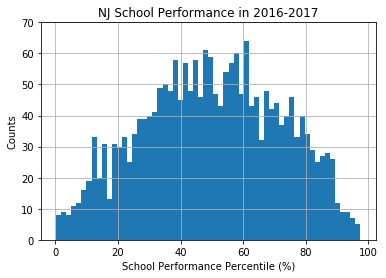

In [9]:
###Plotting
dfSchool_new.hist(column="School_Accountability_Percentile", bins =60)
plt.xlabel('School Performance Percentile (%)')
plt.ylabel('Counts')
plt.ylim([0,70])
plt.title('NJ School Performance in 2016-2017')




This data seems closely uniform. With percentile data, this is something one would generally expect so I'll move on to other analysis.

In [10]:
# Checking missing values:
dfSchool_new.isnull().sum()

County Code                               0
District Code                             0
School Code                               0
School_ID                                 0
Geographic Region                         0
County Name                               0
District Name                             0
School Name                               0
Grade Type                                0
Total Enrollment                          0
Dropout_Rate                              0
Violence_rate                             4
SuspensionRate                            0
Internet_Met_requirement                280
Teacher_Count                            28
Expenditure_perPupil                      0
School_Accountability_Percentile        411
PercentDaysPresent                       43
TeacherAvgYearsExpInSchool                0
StudentTeacher_Ratio                     28
American Indian or Alaska Native       1653
Asian                                   175
Black or African American       

In [11]:
# "Violence Rate": 4 missing values. I assume that there would be no violence in those schools
dfSchool_new['Violence_rate']=dfSchool_new['Violence_rate'].fillna(0)

#School Race: Fill an with 0

race = ['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Hispanic', 'Native Hawaiian or Pacific Islander','Two or More Races', 'White']

dfSchool_new[race]=dfSchool_new[race].fillna(0)

#Mean imputation of missing SchoolPerformance_ELA and SchoolPerformance_Math based on the County
dfSchool_new['SchoolPerformance_ELA'] = dfSchool_new.groupby('County Code').SchoolPerformance_ELA.transform(lambda x: 
                                                                                                            x.fillna(x.mean()))
dfSchool_new['SchoolPerformance_Math'] = dfSchool_new.groupby('County Code').SchoolPerformance_Math.transform(lambda x: x.fillna(x.mean()))

#Mean imputation of missing StudentTeacher_Ratio and School_Accountability_Percentile based on the County
dfSchool_new['StudentTeacher_Ratio'] = dfSchool_new.groupby('County Code').StudentTeacher_Ratio.transform(lambda x: x.fillna(x.mean()))
dfSchool_new['School_Accountability_Percentile'] = dfSchool_new.groupby('County Code').School_Accountability_Percentile.transform(lambda x: x.fillna(x.mean()))

#Mean imputation of missing Falcuty % present day based on the County
dfSchool_new['PercentDaysPresent'] = dfSchool_new.groupby('County Code').PercentDaysPresent.transform(lambda x: x.fillna(x.mean()))

#Internet_Met_requirement: Mode imputation on this missing data based on the district
dfSchool_new['Internet_Met_requirement']=dfSchool_new['Internet_Met_requirement'].fillna('Yes')
#dfSchool_new['Internet_Met_requirement'] = dfSchool_new['Internet_Met_requirement'].fillna(dfSchool_new['Internet_Met_requirement'].mode())
dfSchool_new['Internet_Met_requirement'].fillna(dfSchool_new['Internet_Met_requirement'].mode(), inplace = True)
#dfSchool_new['Internet_Met_requirement'] = dfSchool_new.groupby('District Code').Internet_Met_requirement.transform(lambda x: x.fillna(x.mode()))


In [12]:
dfSchool_new.isnull().sum()

County Code                             0
District Code                           0
School Code                             0
School_ID                               0
Geographic Region                       0
County Name                             0
District Name                           0
School Name                             0
Grade Type                              0
Total Enrollment                        0
Dropout_Rate                            0
Violence_rate                           0
SuspensionRate                          0
Internet_Met_requirement                0
Teacher_Count                          28
Expenditure_perPupil                    0
School_Accountability_Percentile        0
PercentDaysPresent                      0
TeacherAvgYearsExpInSchool              0
StudentTeacher_Ratio                    0
American Indian or Alaska Native        0
Asian                                   0
Black or African American               0
Hispanic                          

In [13]:
# If the School_Accountability_Percentile < 20%, school is at risk of underperforming with class = 1
dfSchool_new['Under_Performance'] = np.where(dfSchool_new['School_Accountability_Percentile'] < 20.0,'Yes','No')
#Class distribution
class_counts = dfSchool_new.groupby('Under_Performance').size()
print(class_counts)


Under_Performance
No     2302
Yes     214
dtype: int64


 Visualization

Grade breakdown is as follows:

A 81 - 100 %

B 61 - 80 %

C 41 - 60 %

D 21 - 40 %

F less than 20 %

In [14]:
#set up bins
bin = [0,20,40,60,80,100]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(dfSchool_new.School_Accountability_Percentile,bin)
category = category.to_frame()
category.columns = ['Performance Percentile']
#concatenate age and its bin
dfSchool_new1 = pd.concat([dfSchool_new,category],axis = 1)

In [15]:
#Regional differences in average School Performance 
barChart1 = (dfSchool_new1.groupby(['Geographic Region', 'Performance Percentile']).agg({'Performance Percentile':'count'})).unstack()
barChart1

Performance Percentile                             \
Performance Percentile                (0, 20] (20, 40] (40, 60] (60, 80]   
Geographic Region                                                          
Atlantic City Region                       12       33       19        9   
Delaware River Region                      60      147      249      101   
Gateway Region                             99      219      407      282   
Shore Region                               19       52      144       64   
Skylands Region                             4       48      117      152   
Southern Shore Region                      23       32       19        4   

                                  
Performance Percentile (80, 100]  
Geographic Region                 
Atlantic City Region           1  
Delaware River Region         26  
Gateway Region               106  
Shore Region                  18  
Skylands Region               48  
Southern Shore Region          2

Text(0,0.5,'Count of schools')

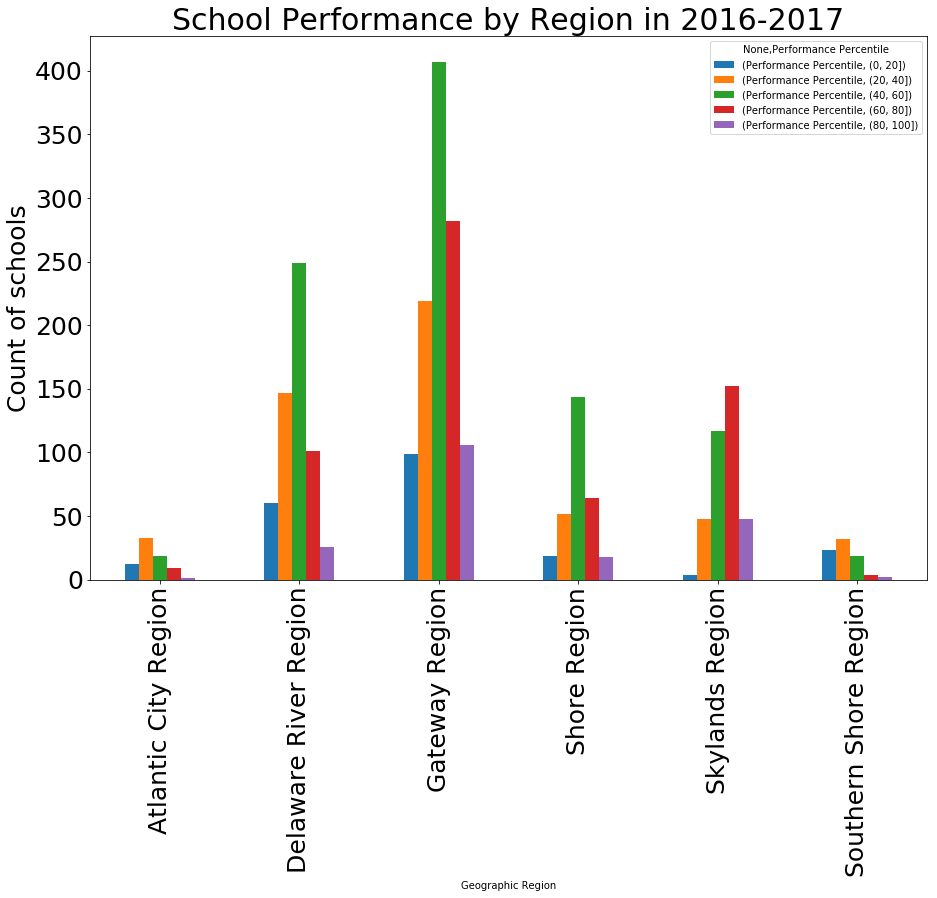

In [16]:
barChart1.plot(kind='bar', figsize=(15, 10),legend=True, title="School Performance by Region", fontsize=25)
plt.title('School Performance by Region in 2016-2017',fontsize=30)
plt.ylabel('Count of schools', fontsize=25)



In [17]:
#Region-wise racial composition
distRaceData = (dfSchool_new.groupby(['Geographic Region']).agg({'American Indian or Alaska Native':'mean', 'Asian':'mean', 'Black or African American':'mean','Hispanic':'mean','Native Hawaiian or Pacific Islander':'mean','Two or More Races':'mean','White':'mean'}))
distRaceData 

distRaceData['Total'] = distRaceData['American Indian or Alaska Native']+distRaceData['Asian']+distRaceData['Black or African American']+distRaceData['Hispanic']+distRaceData['Native Hawaiian or Pacific Islander']+distRaceData['Two or More Races']+distRaceData['White']

distRaceData['American Indian or Alaska Native_Percent'] = (distRaceData['American Indian or Alaska Native']/distRaceData['Total'])*100
distRaceData['Asian_Percent'] = (distRaceData['Asian']/distRaceData['Total'])*100
distRaceData['Black or African American_Percent'] = (distRaceData['Black or African American']/distRaceData['Total'])*100
distRaceData['Hispanic_Percent'] = (distRaceData['Hispanic']/distRaceData['Total'])*100
distRaceData['Native Hawaiian or Pacific Islander_Percent'] = (distRaceData['Native Hawaiian or Pacific Islander']/distRaceData['Total'])*100
distRaceData['White_Percent'] = (distRaceData['White']/distRaceData['Total'])*100
distRaceData['Two or More_Race_Percent'] = (distRaceData['Two or More Races']/distRaceData['Total'])*100
distRaceDataPlot = distRaceData
distRaceDataPlot.drop('White', axis=1, inplace=True)
distRaceDataPlot.drop('American Indian or Alaska Native', axis=1, inplace=True)
distRaceDataPlot.drop('Hispanic', axis=1, inplace=True)
distRaceDataPlot.drop('Black or African American', axis=1, inplace=True)
distRaceDataPlot.drop('Asian', axis=1, inplace=True)
distRaceDataPlot.drop('Native Hawaiian or Pacific Islander_Percent', axis=1, inplace=True)
distRaceDataPlot.drop('Two or More Races', axis=1, inplace=True)
distRaceDataPlot.drop('Total', axis=1, inplace=True)
distRaceDataPlot

,Native Hawaiian or Pacific Islander,American Indian or Alaska Native_Percent,Asian_Percent,Black or African American_Percent,Hispanic_Percent,White_Percent,Two or More_Race_Percent
Geographic Region,,,,,,,
Atlantic City Region,0.275676,0.113515,6.944688,18.527277,29.188232,42.397870,2.552737
Delaware River Region,0.148542,0.127788,6.610669,24.074738,19.602502,46.510188,2.925573
Gateway Region,0.298383,0.128927,11.805120,17.231639,33.552344,35.504216,1.479380
Shore Region,0.159259,0.117176,4.357752,7.299622,17.291944,68.714224,2.060016
Skylands Region,0.181301,0.109760,10.146455,5.560103,15.726884,66.373521,1.901969
Southern Shore Region,0.091250,0.311266,1.043802,15.397020,31.896595,49.209960,2.050103


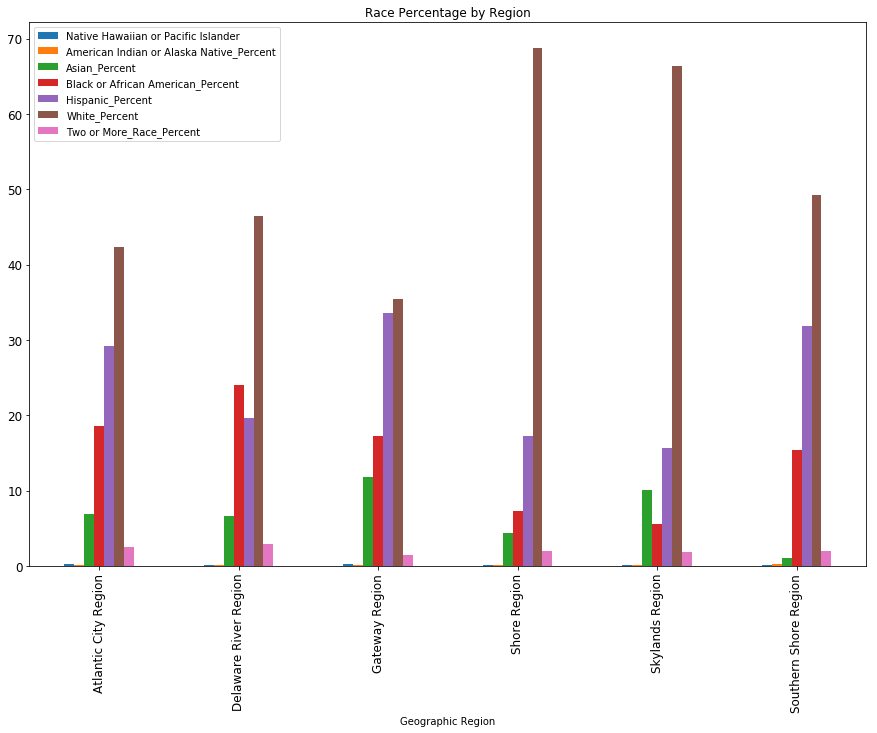

In [18]:
distRaceDataPlot.plot(kind='bar', title ="Race Percentage by Region", figsize=(15, 10), legend=True, fontsize=12)

White are the most populous demographic in all regions. The Caucasian population is highest in Shore and Skylands regions.
 Black students are most populous in the Delaware Region.
Hispanic students are distributed more evently throughout all regions.
Asian students are not populous in the Southern Shore Region and Shore Region

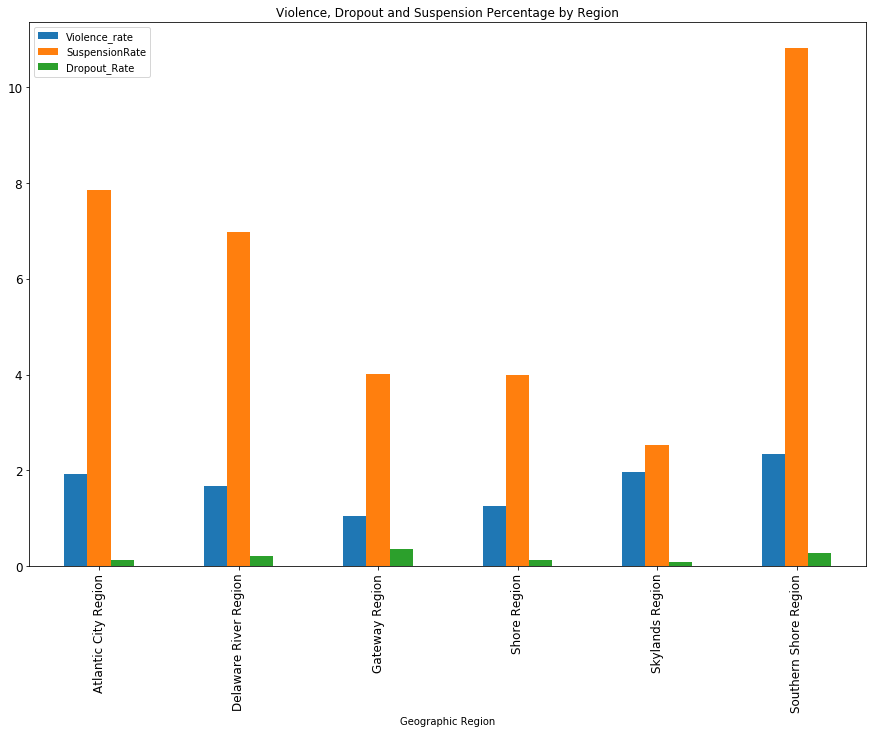

In [19]:
#Violence, Dropout and Suspension Rates across Regions
distVDS = dfSchool_new[['Geographic Region', 'Violence_rate','SuspensionRate','Dropout_Rate']]
distVDS = (dfSchool_new.groupby(['Geographic Region']).agg({'Violence_rate':'mean', 'SuspensionRate':'mean', 'Dropout_Rate':'mean'}))
distVDS
distVDS.plot(kind='bar', title ="Violence, Dropout and Suspension Percentage by Region", figsize=(15, 10), legend=True, fontsize=12)

The figure shows that violence rates are lowest in the Gateway and Shore Regions; Dropout Rates are relatively low in Atlantic City and Shore Region.
Suspension rates are particularly high in the Southwest Shore Regions.

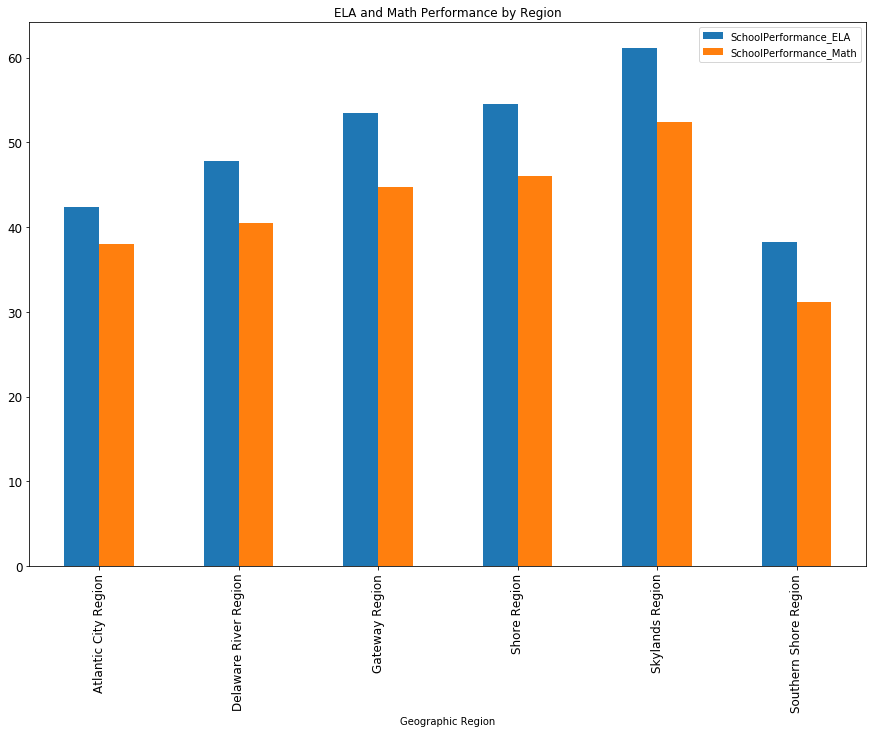

In [21]:
#ELA and Math Performance across Regions
distEM = dfSchool_new[['Geographic Region', 'SchoolPerformance_ELA','SchoolPerformance_Math']]
distEM = (dfSchool_new.groupby(['Geographic Region']).agg({'SchoolPerformance_ELA':'mean', 'SchoolPerformance_Math':'mean'}))
distEM
distEM.plot(kind='bar', title ="ELA and Math Performance by Region", figsize=(15, 10), legend=True, fontsize=12)

In [22]:
dfSchool1 = dfSchool_new.copy()
dfSchool1 = dfSchool1.drop(['County Code','District Code','School Code','School_ID','County Name','District Name','School Name',
                           'School_Accountability_Percentile','Teacher_Count','Grade Type'], axis =1)


In [23]:
dfSchool1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2515
Data columns (total 20 columns):
Geographic Region                      2516 non-null object
Total Enrollment                       2516 non-null int64
Dropout_Rate                           2516 non-null float64
Violence_rate                          2516 non-null float64
SuspensionRate                         2516 non-null float64
Internet_Met_requirement               2516 non-null object
Expenditure_perPupil                   2516 non-null int64
PercentDaysPresent                     2516 non-null float64
TeacherAvgYearsExpInSchool             2516 non-null float64
StudentTeacher_Ratio                   2516 non-null float64
American Indian or Alaska Native       2516 non-null float64
Asian                                  2516 non-null float64
Black or African American              2516 non-null float64
Hispanic                               2516 non-null float64
Native Hawaiian or Pacific Islander    2516 n

#Correlation Between continuous attributes
import seaborn as sns
sns.set(style="whitegrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(dfSchool1.corr(), annot = True, cmap = 'magma', linecolor ='white' , linewidth =0.2)



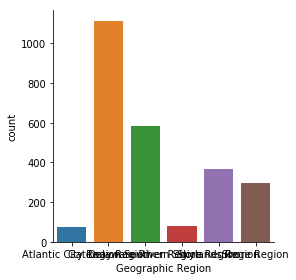

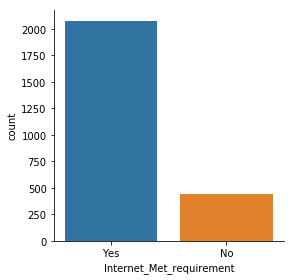

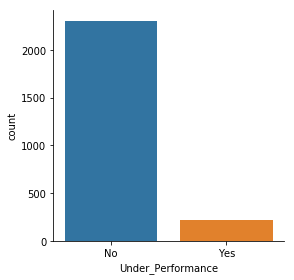

In [24]:
### Bar plots of categorical attributes
cat_col = dfSchool1.select_dtypes(exclude=[np.number]).columns.tolist()
for feature in cat_col:
   sns.factorplot(feature,data=dfSchool1,kind='count')


In [25]:
###Label encoding for categorical variables

for i in dfSchool1.columns:
    if i in cat_col:
        dfSchool1[i] = dfSchool1[i].astype('category').cat.codes
dfSchool1.head()  

,Geographic Region,Total Enrollment,Dropout_Rate,Violence_rate,SuspensionRate,Internet_Met_requirement,Expenditure_perPupil,PercentDaysPresent,TeacherAvgYearsExpInSchool,StudentTeacher_Ratio,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Native Hawaiian or Pacific Islander,Two or More Races,White,SchoolPerformance_ELA,SchoolPerformance_Math,Under_Performance
0,0,360,0.00,1.94,3.1,1,12098,91.6,12.2,12.000000,0.0,0.8,16.7,10.3,0.0,9.2,63.1,48.261538,30.845455,0
1,0,473,0.00,1.27,1.3,1,12098,93.3,14.2,11.536585,0.0,7.2,14.4,14.0,0.4,5.1,59.0,45.825000,43.425000,0
2,0,1843,2.41,6.89,39.2,0,17862,98.8,13.8,11.890323,0.3,20.0,28.2,36.5,0.4,0.2,14.4,32.087500,23.571429,1
3,0,743,0.00,0.00,3.6,0,17862,98.3,14.7,10.768116,0.1,21.8,5.5,68.6,2.6,0.4,0.9,42.940000,38.880000,0
4,0,373,0.00,0.00,0.0,0,17862,98.1,14.7,10.657143,1.1,25.2,18.8,50.7,0.3,1.1,2.9,46.950000,36.100000,0


In [26]:
dfSchool1.corr()

,Geographic Region,Total Enrollment,Dropout_Rate,Violence_rate,SuspensionRate,Internet_Met_requirement,Expenditure_perPupil,PercentDaysPresent,TeacherAvgYearsExpInSchool,StudentTeacher_Ratio,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Native Hawaiian or Pacific Islander,Two or More Races,White,SchoolPerformance_ELA,SchoolPerformance_Math,Under_Performance
Geographic Region,1.000000,-0.030366,-0.018833,0.025182,-0.088300,0.151130,0.101645,0.063271,0.090253,-0.052216,0.034127,-0.019980,-0.252074,-0.077848,-0.026680,-0.105461,0.250557,0.156812,0.132101,-0.041679
Total Enrollment,-0.030366,1.000000,0.034716,0.006888,0.242983,-0.094611,-0.133651,0.027408,-0.007308,0.058050,-0.038586,0.107536,-0.032981,0.097331,-0.011078,-0.145923,-0.085899,-0.131955,-0.216118,0.035451
Dropout_Rate,-0.018833,0.034716,1.000000,0.036657,0.111502,-0.083263,0.055681,-0.026202,-0.010805,0.016614,0.009786,-0.058174,0.156890,0.039726,0.002532,-0.080028,-0.109335,-0.091369,-0.068101,0.149879
Violence_rate,0.025182,0.006888,0.036657,1.000000,0.233550,-0.007841,0.027282,-0.021570,-0.021678,-0.048023,-0.015832,-0.083935,0.185764,0.007340,-0.034772,-0.073559,-0.093227,-0.098525,-0.107361,0.077539
SuspensionRate,-0.088300,0.242983,0.111502,0.233550,1.000000,-0.088499,0.086413,-0.060878,-0.083476,-0.017912,0.014243,-0.159821,0.344123,0.144433,-0.031093,-0.148006,-0.271421,-0.397175,-0.397643,0.350782
Internet_Met_requirement,0.151130,-0.094611,-0.083263,-0.007841,-0.088499,1.000000,-0.048510,0.098803,-0.008953,-0.037727,0.010975,0.078698,-0.219986,-0.168479,0.018503,0.164839,0.236639,0.219234,0.172806,-0.162510
Expenditure_perPupil,0.101645,-0.133651,0.055681,0.027282,0.086413,-0.048510,1.000000,-0.039423,0.124293,-0.089193,0.019539,-0.176818,0.223751,0.039885,-0.015110,-0.118094,-0.103140,-0.093632,-0.059343,0.154137
PercentDaysPresent,0.063271,0.027408,-0.026202,-0.021570,-0.060878,0.098803,-0.039423,1.000000,-0.046925,-0.019726,-0.002553,0.022007,-0.146854,-0.040586,0.022103,0.086111,0.117285,0.187845,0.176133,-0.107595
TeacherAvgYearsExpInSchool,0.090253,-0.007308,-0.010805,-0.021678,-0.083476,-0.008953,0.124293,-0.046925,1.000000,-0.084868,-0.036076,0.028998,-0.126251,-0.117602,-0.009891,0.090773,0.159598,0.012336,0.051148,0.016310
StudentTeacher_Ratio,-0.052216,0.058050,0.016614,-0.048023,-0.017912,-0.037727,-0.089193,-0.019726,-0.084868,1.000000,0.004258,0.014710,-0.002862,0.067884,0.005141,-0.037287,-0.053737,-0.026396,-0.027837,-0.002316


In [27]:
dfSchool1.describe()

,Geographic Region,Total Enrollment,Dropout_Rate,Violence_rate,SuspensionRate,Internet_Met_requirement,Expenditure_perPupil,PercentDaysPresent,TeacherAvgYearsExpInSchool,StudentTeacher_Ratio,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Native Hawaiian or Pacific Islander,Two or More Races,White,SchoolPerformance_ELA,SchoolPerformance_Math,Under_Performance
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,2.216216,545.914547,0.248716,1.417405,4.805326,0.824324,15641.690382,96.080034,11.727226,11.687516,0.129809,8.994038,15.912997,25.605366,0.222814,1.994714,47.140262,52.553910,44.386654,0.085056
std,1.137536,401.182271,2.120687,4.725156,8.655333,0.380620,2652.885694,2.271791,2.819800,8.673269,0.292765,12.981618,21.448798,23.711966,0.597547,2.191239,30.920633,17.219384,17.053726,0.279020
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9201.000000,71.400000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000
25%,1.000000,300.000000,0.000000,0.000000,0.000000,1.000000,13951.000000,95.300000,10.200000,9.946637,0.000000,1.300000,2.300000,8.100000,0.000000,0.300000,15.275000,42.344318,32.463942,0.000000
50%,2.000000,443.000000,0.000000,0.600000,1.500000,1.000000,15439.500000,96.500000,11.800000,11.333333,0.000000,4.000000,6.600000,16.100000,0.000000,1.300000,52.650000,52.456667,42.919872,0.000000
75%,3.000000,673.000000,0.000000,1.760000,5.425000,1.000000,16795.000000,97.400000,13.500000,12.785714,0.200000,10.800000,20.300000,36.125000,0.300000,3.100000,75.200000,65.416193,55.824882,0.000000
max,5.000000,3862.000000,61.730000,200.000000,89.300000,1.000000,52873.000000,100.000000,23.800000,342.000000,4.000000,86.300000,100.000000,100.000000,11.700000,16.400000,100.000000,100.000000,100.000000,1.000000


In [28]:
### Feature Scaling numerical values
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
dfSchool1['Total Enrollment']= StandardScaler().fit_transform(dfSchool1['Total Enrollment'].reshape(-1,1))
dfSchool1['Dropout_Rate']= StandardScaler().fit_transform(dfSchool1['Dropout_Rate'].reshape(-1,1))
dfSchool1['SuspensionRate']= StandardScaler().fit_transform(dfSchool1['SuspensionRate'].reshape(-1,1))
dfSchool1['Violence_rate']= StandardScaler().fit_transform(dfSchool1['Violence_rate'].reshape(-1,1))
dfSchool1['Expenditure_perPupil']= StandardScaler().fit_transform(dfSchool1['Expenditure_perPupil'].reshape(-1,1))
dfSchool1['StudentTeacher_Ratio']= StandardScaler().fit_transform(dfSchool1['StudentTeacher_Ratio'].reshape(-1,1))
dfSchool1['American Indian or Alaska Native']= StandardScaler().fit_transform(dfSchool1['American Indian or Alaska Native'].reshape(-1,1))
dfSchool1['Asian']= StandardScaler().fit_transform(dfSchool1['Asian'].reshape(-1,1))
dfSchool1['Black or African American']= StandardScaler().fit_transform(dfSchool1['Black or African American'].reshape(-1,1))
dfSchool1['Hispanic']= StandardScaler().fit_transform(dfSchool1['Hispanic'].reshape(-1,1))
dfSchool1['Native Hawaiian or Pacific Islander']= StandardScaler().fit_transform(dfSchool1['Native Hawaiian or Pacific Islander'].reshape(-1,1))
dfSchool1['Two or More Races']= StandardScaler().fit_transform(dfSchool1['Two or More Races'].reshape(-1,1))
dfSchool1['Expenditure_perPupil']= StandardScaler().fit_transform(dfSchool1['Expenditure_perPupil'].reshape(-1,1))
dfSchool1['White']= StandardScaler().fit_transform(dfSchool1['White'].reshape(-1,1))
dfSchool1['SchoolPerformance_ELA']= StandardScaler().fit_transform(dfSchool1['SchoolPerformance_ELA'].reshape(-1,1))
dfSchool1['SchoolPerformance_Math']= StandardScaler().fit_transform(dfSchool1['SchoolPerformance_Math'].reshape(-1,1))
dfSchool1['PercentDaysPresent']= StandardScaler().fit_transform(dfSchool1['PercentDaysPresent'].reshape(-1,1))
dfSchool1['TeacherAvgYearsExpInSchool']= StandardScaler().fit_transform(dfSchool1['TeacherAvgYearsExpInSchool'].reshape(-1,1))


C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please

In [29]:
dfSchool1.describe()

,Geographic Region,Total Enrollment,Dropout_Rate,Violence_rate,SuspensionRate,Internet_Met_requirement,Expenditure_perPupil,PercentDaysPresent,TeacherAvgYearsExpInSchool,StudentTeacher_Ratio,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Native Hawaiian or Pacific Islander,Two or More Races,White,SchoolPerformance_ELA,SchoolPerformance_Math,Under_Performance
count,2516.000000,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2516.000000,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2516.000000
mean,2.216216,-1.247898e-16,-1.014358e-16,-5.992380e-17,2.576988e-17,0.824324,-3.199613e-16,-1.331738e-15,-3.692948e-16,-8.604670e-18,1.079776e-16,-6.221838e-17,-2.010404e-16,-2.297667e-16,5.139856e-16,4.124505e-16,1.412048e-17,-2.506386e-17,2.592874e-16,0.085056
std,1.137536,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.380620,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.279020
min,0.000000,-1.356049e+00,-1.173043e-01,-3.000295e-01,-5.552971e-01,0.000000,-2.428288e+00,-1.086585e+01,-4.159713e+00,-1.301673e+00,-4.434784e-01,-6.929665e-01,-7.420537e-01,-1.080065e+00,-3.729555e-01,-9.104943e-01,-1.524860e+00,-2.471771e+00,-2.016773e+00,0.000000
25%,1.000000,-6.130965e-01,-1.173043e-01,-3.000295e-01,-5.552971e-01,1.000000,-6.374291e-01,-3.434247e-01,-5.417155e-01,-2.007576e-01,-4.434784e-01,-5.928050e-01,-6.348003e-01,-7.383970e-01,-3.729555e-01,-7.735583e-01,-1.030755e+00,-5.930306e-01,-6.992655e-01,0.000000
50%,2.000000,-2.565791e-01,-1.173043e-01,-1.730243e-01,-3.819591e-01,1.000000,-7.623041e-02,1.848979e-01,2.581343e-02,-4.084424e-02,-4.434784e-01,-3.847772e-01,-4.342830e-01,-4.009476e-01,-3.729555e-01,-3.171046e-01,1.782251e-01,-5.648440e-03,-8.602659e-02,0.000000
75%,3.000000,3.168403e-01,-1.173043e-01,7.251897e-02,7.160872e-02,1.000000,4.348242e-01,5.811399e-01,6.288130e-01,1.266439e-01,2.397988e-01,1.391445e-01,2.045744e-01,4.437306e-01,1.291972e-01,5.045119e-01,9.076566e-01,7.471138e-01,6.708506e-01,0.000000
max,5.000000,8.267426e+00,2.899697e+01,4.203503e+01,9.764093e+00,1.000000,1.403706e+01,1.725839e+00,4.282281e+00,3.809154e+01,1.322206e+01,5.956217e+00,3.921139e+00,3.138054e+00,1.921100e+01,6.575345e+00,1.709869e+00,2.755936e+00,3.261716e+00,1.000000


# Model Building

In [30]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
"""
Function to upsample or downsample input data to balance label classes
df = input (unbalanced) DF
r = majority : minority label class ratio to allow in output dataframe (e.g. R=1 creates a data frame with 1:1 maj:min) 
upsample = Whether to upsample minority class (if True) or downsample majority class (if False) to achieve balanced classes
features = Model features (list of variables)
label = Model label (variable name)
returns: new DF, with balanced label classes
"""
def sampler(df, r, upsample, features, label):
    nlabel = df[label].value_counts()[1]
    nsamp = int(round(nlabel*r))  
    if upsample==True:
        df_1 = df[df[label]==1].sample(n=nsamp, replace=True).copy()
        df_0 = df[df[label]==0].sample(n=nsamp, replace=True).copy()
    else:
        df_1 = df[df[label]==1].copy()
        df_0 = df[df[label]==0].sample(n=nsamp).copy()
        
    return pd.concat([df_1, df_0], axis=0)

"""
Function to plot the precision-recall tradeoff of various classification algoritms (no class balancing)
classname = Name of algorithm used (as string)
classifier = SK-Learn Classification algorithm
features = Model featuers (list of variable names)
label = Model label (variable name)
return: precision-recall curve for input classifier
"""

def plot_PR_curve_noadj(classname, classifier, features, label):
    train_X=train[features]
    train_y=train[label]
    
    test_X=test[features]
    test_y=test[label]
    
    model=classifier.fit(train_X, train_y)
    
    pr1 = [x[1] for x in model.predict_proba(test_X)]
    #print classname, np.min(pr1), np.median(pr1), np.max(pr1)
    
    prec, recall, t = precision_recall_curve(test_y, pr1)
    plt.plot(prec, recall, label=classname)
    
"""
Function to plot the precision-recall tradeoff of various classification algoritms (with class balancing)
classname = Name of algorithm used (as string)
classifier = SK-Learn Classification algorithm
r = majority : minority label class ratio to allow in output dataframe (e.g. R=1 creates a data frame with 1:1 maj:min) 
upsample = Whether to upsample minority class (if True) or downsample majority class (if False) to acheive balanced classes
features = Model featuers (list of variable names)
label = Model label (variable name)
return: precision-recall curve for input classifier
"""

def plot_PR_curve(classname, classifier, r, upsample, features, label):
    strain=sampler(train, r, upsample, features, label)
    #print strain.CLOSED.value_counts()
    
    strain_X=strain[features]
    strain_y=strain[label]
    
    test_X=test[features]
    test_y=test[label]
    
    model=classifier.fit(strain_X, strain_y)

    pr1 = [x[1] for x in model.predict_proba(test_X)]
    #print classname, np.min(pr1), np.median(pr1), np.max(pr1)
    
    prec, recall, t = precision_recall_curve(test_y, pr1)
    plt.plot(prec, recall, label=classname)

In [32]:
train, test = train_test_split(dfSchool1, test_size=0.3, random_state=0)

print("Training Size: ", train.shape[0])
print("Test Size:     ", test.shape[0])

X = dfSchool1.columns.values.tolist()
X.remove('Under_Performance') # list of features
Y = 'Under_Performance'

Training Size:  1761
Test Size:      755


Text(0.5,1,'Precision-Recall Tradeoff (Trees=500)')

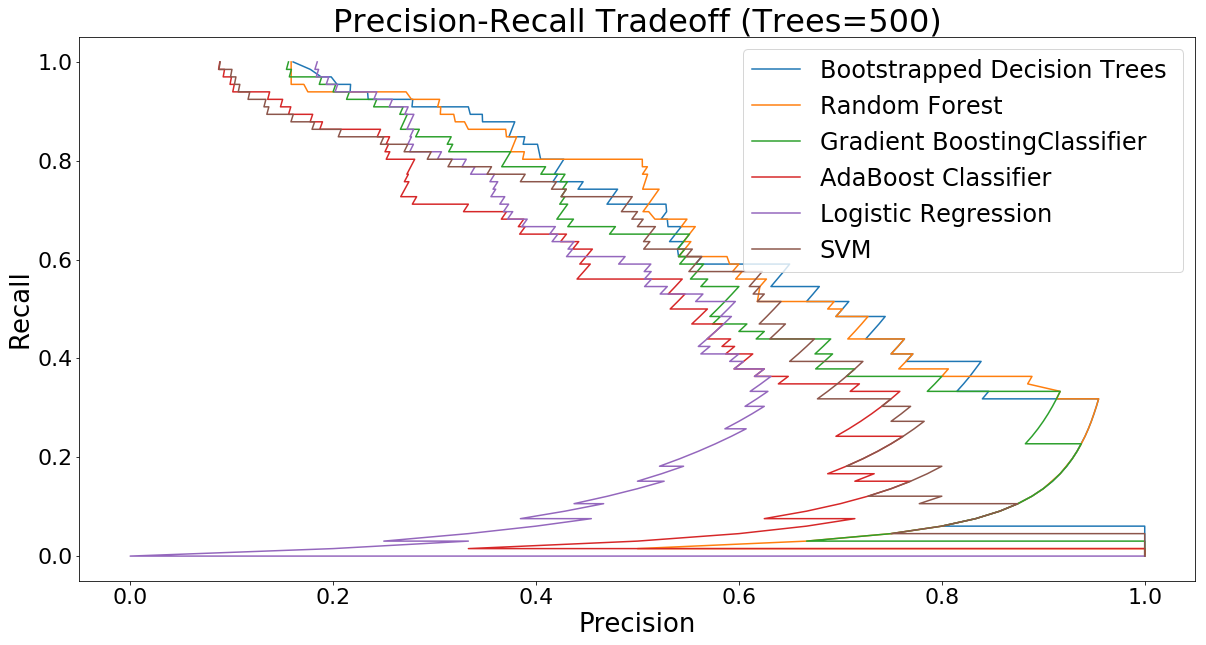

In [33]:
#Evaluate Precision-Recall Tradeoff without any upsampling or downsampling
plt.figure(figsize=(20,10))

plot_PR_curve_noadj("Bootstrapped Decision Trees ", BaggingClassifier(n_estimators=500), X, Y)
plot_PR_curve_noadj("Random Forest", RandomForestClassifier(n_estimators=500), X, Y)
plot_PR_curve_noadj("Gradient BoostingClassifier", GradientBoostingClassifier(n_estimators=500), X, Y)
plot_PR_curve_noadj("AdaBoost Classifier", AdaBoostClassifier(n_estimators=500), X, Y)
plot_PR_curve_noadj("Logistic Regression", LogisticRegression(C=0.0001, n_jobs=1, class_weight = 'balanced'), X, Y)
plot_PR_curve_noadj("SVM", SVC(kernel = 'rbf', probability=True), X, Y)

plt.legend(loc="best", fontsize=24)
plt.xlabel("Precision", fontsize=26)
plt.ylabel("Recall", fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Precision-Recall Tradeoff (Trees=500)", fontsize=32)


Text(0.5,1,'Precision-Recall Tradeoff (1:1 Downsampling) (Trees=500)')

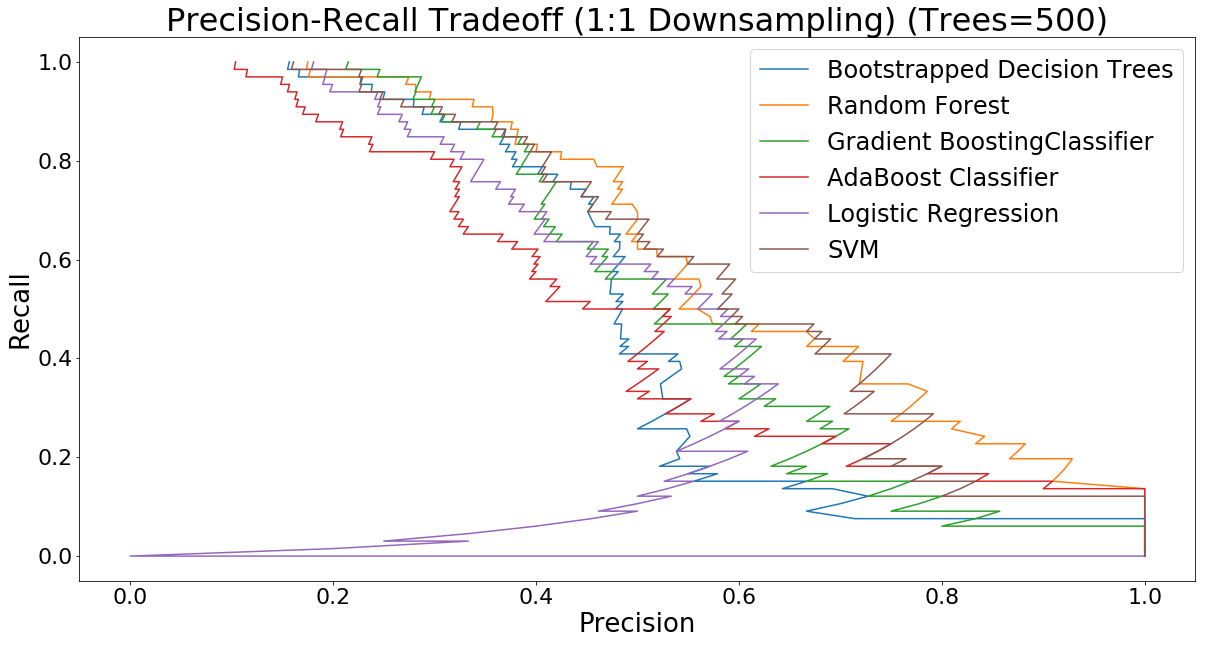

In [34]:
#Evaluate precision-recall tradeoff with 1:1 downsampling

plt.figure(figsize=(20,10))
plot_PR_curve("Bootstrapped Decision Trees", BaggingClassifier(n_estimators=500), 1.0, False, X, Y)
plot_PR_curve("Random Forest", RandomForestClassifier(n_estimators=500), 1.0, False, X, Y)
plot_PR_curve("Gradient BoostingClassifier", GradientBoostingClassifier(n_estimators=500), 1.0, False, X, Y)
plot_PR_curve("AdaBoost Classifier", AdaBoostClassifier(n_estimators=500), 1.0, False, X, Y)
plot_PR_curve("Logistic Regression", LogisticRegression(C=0.0001, n_jobs=1, class_weight = 'balanced'), 1.0, False, X, Y)
plot_PR_curve("SVM", SVC(kernel = 'rbf', probability=True),1.0, False, X, Y)


plt.legend(loc="best", fontsize=24)
plt.xlabel("Precision", fontsize=26)
plt.ylabel("Recall", fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Precision-Recall Tradeoff (1:1 Downsampling) (Trees=500)", fontsize=32)


Downsampling

In [35]:
from sklearn.model_selection import train_test_split
###Make sure the frequency of positive and negative samples is approximately the same 
#for training data as well as for test data

train_X, test_X, train_y, test_y = train_test_split(dfSchool1[X], dfSchool1[Y], test_size=0.3, random_state = 0)


print('% risk: ', dfSchool1[dfSchool1[Y] == 1].shape[0] / dfSchool1.shape[0] * 100)
print('Train - size:', train_y.shape[0], ', %risk:', train_y[train_y == 1].shape[0] / train_y.shape[0] * 100)
print('Test - size:', test_y.shape[0], ', %risk: ', test_y[test_y == 1].shape[0] / test_y.shape[0] * 100)

% risk:  8.505564387917328
Train - size: 1761 , %risk: 8.404315729699034
Test - size: 755 , %risk:  8.741721854304636


In [36]:
def undersample(data, n=1):
    positive_samples = dfSchool1[dfSchool1[Y] == 1].copy().apply(np.random.permutation)
    negative_samples = dfSchool1[dfSchool1[Y] == 0].copy().apply(np.random.permutation).head(positive_samples.shape[0] * n)

    undersampled_data = pd.concat([positive_samples, negative_samples])

    u_train_X, u_test_X, u_train_y, u_test_y = train_test_split(undersampled_data[X], undersampled_data[Y], test_size=0.3)
    print('% risk: ', undersampled_data[undersampled_data[Y] == 1].shape[0] / undersampled_data.shape[0] * 100)
    print('Train - size:', u_train_y.shape[0], ', %risk:', u_train_y[u_train_y == 1].shape[0] / u_train_y.shape[0] * 100)
    print('Test - size:', u_test_y.shape[0], ', %risk: ', u_test_y[u_test_y == 1].shape[0] / u_test_y.shape[0] * 100)
    
    return u_train_X, u_test_X, u_train_y, u_test_y

u_train_X, u_test_X, u_train_y, u_test_y = undersample(dfSchool1, 1)

% risk:  50.0
Train - size: 299 , %risk: 49.83277591973244
Test - size: 129 , %risk:  50.3875968992248


In [37]:
from sklearn.linear_model import LogisticRegression
u_lr_model = LogisticRegression(C=0.0001, n_jobs=1, class_weight = 'balanced')
u_lr_model.fit(u_train_X, u_train_y)
u_lr_pred = u_lr_model.predict(u_test_X) #predicted class
print(metrics.classification_report(u_test_y, u_lr_pred))

from sklearn.metrics import average_precision_score


             precision    recall  f1-score   support

          0       1.00      0.70      0.83        64
          1       0.77      1.00      0.87        65

avg / total       0.89      0.85      0.85       129



In [38]:
# Let's test on the full data
lr_pred = u_lr_model.predict(test_X) #predicted class
print(metrics.classification_report(test_y, lr_pred))

average_precision_score(test_y, lr_pred)  

             precision    recall  f1-score   support

          0       1.00      0.63      0.77       689
          1       0.20      0.97      0.33        66

avg / total       0.93      0.66      0.73       755



0.19719636104447913

In [39]:
###SVM
from sklearn.svm import SVC
svc_model = SVC(C=10)
svc_model.fit(u_train_X, u_train_y)
u_svc_pred = svc_model.predict(u_test_X) #predicted class
print(metrics.classification_report(u_test_y, u_svc_pred))

svc_pred = svc_model.predict(test_X) 
print(metrics.classification_report(test_y, svc_pred))

average_precision_score(test_y, svc_pred) 


             precision    recall  f1-score   support

          0       0.97      0.95      0.96        64
          1       0.95      0.97      0.96        65

avg / total       0.96      0.96      0.96       129

             precision    recall  f1-score   support

          0       0.98      0.80      0.88       689
          1       0.28      0.80      0.41        66

avg / total       0.92      0.80      0.84       755



0.23888836627868085

In [40]:
###Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(u_train_X, u_train_y)
print(metrics.classification_report(u_test_y,clf.predict(u_test_X)))
print(metrics.classification_report(test_y,clf.predict(test_X)))
average_precision_score(test_y, clf.predict(test_X)) 


             precision    recall  f1-score   support

          0       0.96      0.86      0.91        64
          1       0.88      0.97      0.92        65

avg / total       0.92      0.91      0.91       129

             precision    recall  f1-score   support

          0       0.98      0.76      0.86       689
          1       0.26      0.86      0.40        66

avg / total       0.92      0.77      0.82       755



0.23366500154579622

In [41]:
### Boostrapped decision tree

boost_tree_model = BaggingClassifier(n_estimators=500)
boost_tree_model.fit(u_train_X, u_train_y)

u_btree_pred = boost_tree_model.predict(u_test_X) #predicted class
print(metrics.classification_report(u_test_y, u_btree_pred))

btree_pred = boost_tree_model.predict(test_X)
print(metrics.classification_report(test_y, btree_pred))

average_precision_score(test_y, btree_pred)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96        64
          1       0.97      0.95      0.96        65

avg / total       0.96      0.96      0.96       129

             precision    recall  f1-score   support

          0       0.99      0.76      0.86       689
          1       0.26      0.89      0.40        66

avg / total       0.92      0.77      0.82       755



0.24161700442296763

In [42]:
bdt = AdaBoostClassifier(n_estimators=500)
bdt.fit(u_train_X, u_train_y)

u_bdt_pred = bdt.predict(u_test_X) #predicted class
print(metrics.classification_report(u_test_y, u_bdt_pred))

bdt_pred = bdt.predict(test_X)
print(metrics.classification_report(test_y, bdt_pred))

average_precision_score(test_y, bdt_pred)

             precision    recall  f1-score   support

          0       0.98      0.97      0.98        64
          1       0.97      0.98      0.98        65

avg / total       0.98      0.98      0.98       129

             precision    recall  f1-score   support

          0       0.99      0.80      0.88       689
          1       0.29      0.88      0.44        66

avg / total       0.93      0.80      0.84       755



0.26801873845823276

In [43]:
gbc = GradientBoostingClassifier(n_estimators=500).fit(u_train_X, u_train_y)

u_gbc_pred = gbc.predict(u_test_X) #predicted class
print(metrics.classification_report(u_test_y, u_gbc_pred))

gbc_pred = gbc.predict(test_X) 
print(metrics.classification_report(test_y, gbc_pred))

average_precision_score(test_y, gbc_pred)


             precision    recall  f1-score   support

          0       0.98      0.98      0.98        64
          1       0.98      0.98      0.98        65

avg / total       0.98      0.98      0.98       129

             precision    recall  f1-score   support

          0       0.99      0.79      0.88       689
          1       0.29      0.88      0.43        66

avg / total       0.92      0.80      0.84       755



0.26417660842885715

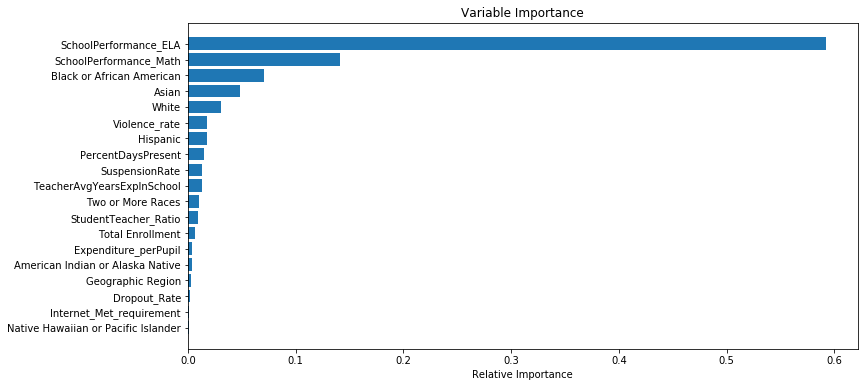

array([ 0.00286699,  0.00613775,  0.00181065,  0.01784102,  0.01311653,
        0.00124529,  0.00415588,  0.01476723,  0.01282793,  0.00933179,
        0.00403494,  0.04834874,  0.07093105,  0.01722663,  0.00107015,
        0.00995942,  0.03082574,  0.59191862,  0.14158364])

In [44]:

feature_importances = np.mean([tree.feature_importances_ for tree in boost_tree_model.estimators_
], axis=0)

sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, u_train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

feature_importances

In [45]:
### Univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# find best scored 5 features
select_feature = SelectKBest(f_classif, k=5).fit(u_train_X, u_train_y)
print('Score list:', select_feature.scores_)
print('Feature list:', u_train_X.columns)

#So lets se what happens if we use only these best scored 5 feature.

x_train_2 = select_feature.transform(u_train_X)
x_test_2 = select_feature.transform(test_X)

# BaggingClassifier
boost_tree_model_2 = BaggingClassifier(n_estimators=500)      
boost_tree_model_2 = boost_tree_model_2.fit(x_train_2,u_train_y)

btree_pred_2 = boost_tree_model_2.predict(x_test_2)
print(metrics.classification_report(test_y, btree_pred_2))

average_precision_score(test_y, btree_pred_2)



Score list: [  3.72728782e-01   2.16596246e+00   2.29730348e+00   1.90030789e+01
   3.78888279e+01   1.23331148e+01   1.61809445e+01   8.09482088e+00
   5.85164961e-01   4.70736233e-01   1.03603196e-02   3.94183386e+01
   5.91107980e+01   2.52278299e+01   1.67808457e+00   2.78267839e+01
   8.14904390e+01   3.21707530e+02   1.64841808e+02]
Feature list: Index(['Geographic Region', 'Total Enrollment', 'Dropout_Rate',
       'Violence_rate', 'SuspensionRate', 'Internet_Met_requirement',
       'Expenditure_perPupil', 'PercentDaysPresent',
       'TeacherAvgYearsExpInSchool', 'StudentTeacher_Ratio',
       'American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Hispanic',
       'Native Hawaiian or Pacific Islander', 'Two or More Races', 'White',
       'SchoolPerformance_ELA', 'SchoolPerformance_Math'],
      dtype='object')
             precision    recall  f1-score   support

          0       0.99      0.76      0.86       689
          1       0.27      0.89 

0.24685001075729551

In [46]:
#Logistic R
u_lr_model_2=u_lr_model.fit(x_train_2,u_train_y)

u_lr_pred_2 = u_lr_model_2.predict(x_test_2)
print(metrics.classification_report(test_y, u_lr_pred_2))

average_precision_score(test_y, u_lr_pred_2)

             precision    recall  f1-score   support

          0       1.00      0.57      0.72       689
          1       0.18      0.98      0.30        66

avg / total       0.93      0.61      0.69       755



0.17816193843598624

In [47]:
svc_model_2 = svc_model.fit(x_train_2,u_train_y)

svm_pred_2 = svc_model_2.predict(x_test_2)
print(metrics.classification_report(test_y, svm_pred_2))

average_precision_score(test_y, svm_pred_2)

             precision    recall  f1-score   support

          0       0.99      0.78      0.87       689
          1       0.28      0.88      0.42        66

avg / total       0.92      0.79      0.83       755



0.25682644663352988

In [48]:
###Random forest

clf_2 = clf.fit(x_train_2,u_train_y)
clf_pred_2 = clf_2.predict(x_test_2)
print(metrics.classification_report(test_y, clf_pred_2))

average_precision_score(test_y, clf_pred_2)

             precision    recall  f1-score   support

          0       0.99      0.74      0.85       689
          1       0.25      0.91      0.39        66

avg / total       0.92      0.75      0.81       755



0.23521974714027694

In [49]:
gbc_2 = GradientBoostingClassifier(n_estimators=500).fit(x_train_2,u_train_y)

gbc_pred_2 = gbc_2.predict(x_test_2) #predicted class
print(metrics.classification_report(test_y, gbc_pred_2))

average_precision_score(test_y, gbc_pred_2)


             precision    recall  f1-score   support

          0       0.99      0.80      0.88       689
          1       0.30      0.89      0.45        66

avg / total       0.93      0.81      0.85       755



0.27836552441566637

In [50]:

# Recursive Feature Elimination
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel     

#Random forest
rfe_1 = RFE(estimator=clf, n_features_to_select=5, step=1)
rfe_1 = rfe_1.fit(u_train_X, u_train_y)
print('Chosen best 5 feature by rfe:',u_train_X.columns[rfe_1.support_])
clf_pred_3 = rfe_1.predict(test_X)
print(metrics.classification_report(test_y, clf_pred_3))
average_precision_score(test_y, clf_pred_3)



Chosen best 5 feature by rfe: Index(['Black or African American', 'Two or More Races', 'White',
       'SchoolPerformance_ELA', 'SchoolPerformance_Math'],
      dtype='object')
             precision    recall  f1-score   support

          0       0.99      0.76      0.86       689
          1       0.26      0.91      0.41        66

avg / total       0.93      0.77      0.82       755



0.24718146962831519

C:\Users\Amy Le - PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,1,'School Performance by Features')

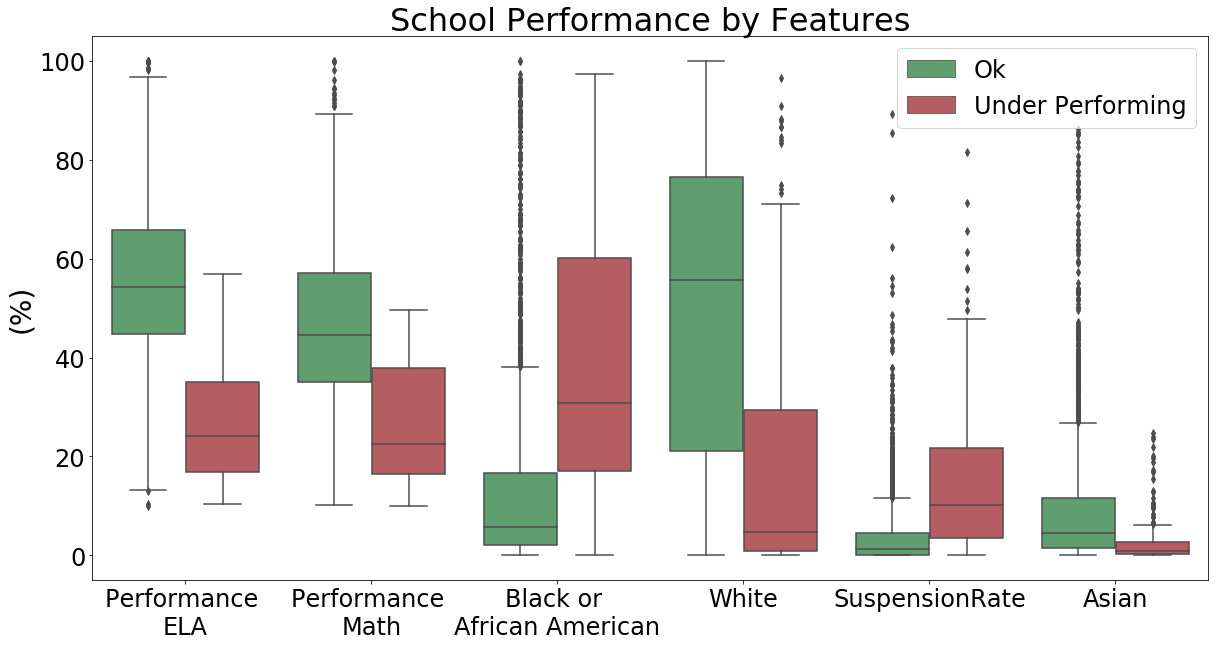

In [51]:
def graph_by_underperforming(df, variables):
    new_df=pd.DataFrame()
    
    for variable in variables:
        temp_df=pd.DataFrame({"var":variable, "underperforming": df["Under_Performance"], "value": df[variable].apply(lambda x: x)})
        
        new_df=pd.concat([new_df, temp_df], axis=0)

    new_df["underperforming_txt"]="Ok"
    new_df.ix[new_df.underperforming=='Yes', "underperforming_txt"]="Under Performing"
      
    return sns.boxplot(x="var", y="value", hue="underperforming_txt", data=new_df, palette=[green, red])


plt.figure(figsize=(20,10))
green = sns.color_palette("deep")[1]
red = sns.color_palette("deep")[2]

fig = graph_by_underperforming(dfSchool_new, ['SchoolPerformance_ELA', 'SchoolPerformance_Math','Black or African American', 'White', 'SuspensionRate', 'Asian'])
plt.legend(loc="best", fontsize=24)

plt.xlabel(" ")
plt.ylabel("(%)", fontsize=28)
fig.set_xticklabels(['Performance \nELA', 'Performance \nMath','Black or \nAfrican American', 'White', 'SuspensionRate', 'Asian'])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title("School Performance by Features", fontsize=32)
